In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import matplotlib.lines as mlines
from scipy.optimize import curve_fit
from scipy.stats import sem
import h5py
from pathlib import Path
from collections.abc import Iterable
from matplotlib.colors import LogNorm

In [2]:
datapath = Path.cwd() / "data/with_otocs/"
figurepath = Path.cwd().parent / "figures"

In [3]:
W = 5.88    # Figure width in inches, approximately A4-width - 2*1.25in margin
plt.rcParams.update({
    'figure.figsize': (W, W),#/(4/3)),     # 1:1 aspect ratio
    'font.size' : 11,                   # Set font size to 11pt
    'axes.labelsize': 11,               # -> axis labels
    'legend.fontsize': 10,              # -> legends
    'font.family': 'lmodern',
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        r'\usepackage{lmodern}'
        # ... more packages if needed
    )
})

In [4]:
def set_size(width='thesis', fraction=1, subplots=(1, 1),aspect_ratio=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    #aspect_ratio = 1#(5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * aspect_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


In [ ]:
np

In [90]:
def rearrange_data(arr): #
    res = np.swapaxes(arr,-1,-2)
    #res = np.swapaxes(arr,-2,0)
    return res[:,:,0]
def rearrange_data_oto(arr):
    res = np.swapaxes(arr,0,-1)
    return res[:,0,:,:]

In [104]:
fids = []
otoFl = []
ototrue = []
folders = [datapath/"WAHUHA/N = 11",datapath/"WAHUHA/N = 13",
            datapath/"Rhim/N = 11",datapath/"Rhim/N = 13",
            datapath/"WAHUHACS/N = 11",datapath/"WAHUHACS/N = 13",
            datapath/"RhimCS/N = 11",datapath/"RhimCS/N = 13"]
cycles = [1,5,10,50,100,500,1000]
# files = [["4682{}_N11_BS.jld2".format(i) for i in range(88,95)],
#         ["468{}_N12_BS.jld2".format(i) for i in range(295,308)],
#         ["4683{}_N13_BS.jld2".format(i) for i in range(9,23)],

#         ["4683{}_N11_BS.jld2".format(i) for i in range(23,30)],
#         ["4683{}_N12_BS.jld2".format(i) for i in range(30,44)],
#         ["4683{}_N13_BS.jld2".format(i) for i in range(44,58)],

#         ["4683{}_N11_BS.jld2".format(i) for i in range(58,65)],
#         ["4683{}_N12_BS.jld2".format(i) for i in range(65,79)],
#         ["4683{}_N13_BS.jld2".format(i) for i in range(79,93)],

#         ["4683{}_N11_BS.jld2".format(i) for i in range(93,100)],
#         ["46840{}_N12_BS.jld2".format(i) for i in range(0,10)]+["4684{}_N12_BS.jld2".format(i) for i in range(10,14)],
#         ["4684{}_N13_BS.jld2".format(i) for i in range(14,28)]
#]
files = [["510486_N11_BS.jld2","510487_N11_BS.jld2","510488_N11_BS.jld2"],
        ["510498_N13_BS.jld2","510502_N13_BS.jld2"],
        
        ["510497_N11_BS.jld2","510496_N11_BS.jld2","510495_N11_BS.jld2"],
        ["510500_N13_BS.jld2","510505_N13_BS.jld2"],
        
        ["510491_N11_BS.jld2","510490_N11_BS.jld2"],
        ["510499_N13_BS.jld2","510503_N13_BS.jld2"],
        
        ["510492_N11_BS.jld2","510493_N11_BS.jld2","510494_N11_BS.jld2"],
        ["510501_N13_BS.jld2","510504_N13_BS.jld2"]
        ]
Njs = [3,2,3,2,2,2,3,2] 
for i in range(len(folders)):
    fids.append([])
    otoFl.append([])
    ototrue.append([])
    for j in range(Njs[i]):
        try:
            with h5py.File(folders[i]/files[i][j],"r") as f:
                fids[i].append(np.asarray(f["fidelities"][()]))
                otoFl[i].append(np.asarray(f["otocs"][()]))
                ototrue[i].append(np.asarray(f["true_otocs"][()]))
        except:
            print(folders[i]/files[i][j])

fids11W = fids[0]
for j in range(Njs[0]):
    fids11W[j] = np.swapaxes(rearrange_data(fids11W[j]),0,1)
fids11R = fids[2]
for j in range(Njs[2]):
    fids11R[j] = np.swapaxes(rearrange_data(fids11R[j]),0,1)
fids11WCS = fids[4]
for j in range(Njs[4]):
    fids11WCS[j] = np.swapaxes(rearrange_data(fids11WCS[j]),0,1)
fids11RCS = fids[6]
for j in range(Njs[6]):
    fids11RCS[j] = np.swapaxes(rearrange_data(fids11RCS[j]),0,1)

fids13W = fids[1]
for j in range(Njs[1]):
    fids13W[j] = np.swapaxes(rearrange_data(fids13W[j]),0,1)
fids13R = fids[3]
for j in range(Njs[3]):
    fids13R[j] = np.swapaxes(rearrange_data(fids13R[j]),0,1)
fids13WCS = fids[5]
for j in range(Njs[5]):
    fids13WCS[j] = np.swapaxes(rearrange_data(fids13WCS[j]),0,1)
fids13RCS = fids[7]
for j in range(Njs[7]):
    fids13RCS[j] = np.swapaxes(rearrange_data(fids13RCS[j]),0,1)

#######

otoFl11W = otoFl[0]
for j in range(Njs[0]):
    otoFl11W[j] = rearrange_data_oto(otoFl11W[j])
otoFl11R = otoFl[2]
for j in range(Njs[2]):
    otoFl11R[j] = rearrange_data_oto(otoFl11R[j])
otoFl11WCS = otoFl[4]
for j in range(Njs[4]):
    otoFl11WCS[j] = rearrange_data_oto(otoFl11WCS[j])
otoFl11RCS = otoFl[6]
for j in range(Njs[6]):
    otoFl11RCS[j] = rearrange_data_oto(otoFl11RCS[j])

otoFl13W = otoFl[1]
for j in range(Njs[1]):
    otoFl13W[j] = rearrange_data_oto(otoFl13W[j])
otoFl13R = otoFl[3]
for j in range(Njs[3]):
    otoFl13R[j] = rearrange_data_oto(otoFl13R[j])
otoFl13WCS = otoFl[5]
for j in range(Njs[5]):
    otoFl13WCS[j] = rearrange_data_oto(otoFl13WCS[j])
otoFl13RCS = otoFl[7]
for j in range(Njs[7]):
    otoFl13RCS[j] = rearrange_data_oto(otoFl13RCS[j])


#######

ototrue11W = ototrue[0]
for j in range(Njs[0]):
    ototrue11W[j] = 2*np.ones((200,11,50))-2*rearrange_data_oto(ototrue11W[j])
ototrue11R = ototrue[2]
for j in range(Njs[2]):
    ototrue11R[j] = 2*np.ones((200,11,50))-2*rearrange_data_oto(ototrue11R[j])
ototrue11WCS = ototrue[4]
for j in range(Njs[4]):
    ototrue11WCS[j] = 2*np.ones((200,11,50))-2*rearrange_data_oto(ototrue11WCS[j])
ototrue11RCS = ototrue[6]
for j in range(Njs[6]):
    ototrue11RCS[j] = 2*np.ones((200,11,50))-2*rearrange_data_oto(ototrue11RCS[j])

ototrue13W = ototrue[1]
for j in range(Njs[1]):
    ototrue13W[j] = 2*np.ones((200,13,25))-2*rearrange_data_oto(ototrue13W[j])
ototrue13R = ototrue[3]
for j in range(Njs[3]):
    ototrue13R[j] = 2*np.ones((200,13,25))-2*rearrange_data_oto(ototrue13R[j])
ototrue13WCS = ototrue[5]
for j in range(Njs[5]):
    ototrue13WCS[j] = 2*np.ones((200,13,25))-2*rearrange_data_oto(ototrue13WCS[j])
ototrue13RCS = ototrue[7]
for j in range(Njs[7]):
    ototrue13RCS[j] = 2*np.ones((200,13,25))-2*rearrange_data_oto(ototrue13RCS[j])

In [5]:
ns = [100,500,1000]
T = np.arange(0.1,20.1,0.1)
Nstates11 = 50

In [14]:
tc = 0.5 * 1e-6
t = 10 * 1e-6
n = 5*t/tc
n

100.0

In [17]:
5*t/1000 *1e9

50.0

In [10]:
5*1e9*tc

2500.0

In [11]:
t = 1 *1e-6
n = 50
tc = 5*t/n
1/tc /1e3

10000.0

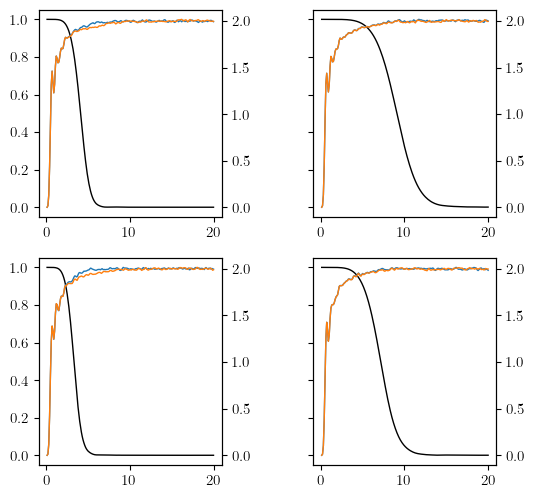

In [177]:
fig,axs = plt.subplots(2,2,figsize=set_size(subplots=(2,2)),sharey=True)
nset=0
j=3
axr00 = axs[0,0].twinx()
axs[0,0].plot(T,np.mean(fids13W[nset],axis=1),c="black",lw=1)
#axr00.plot(T[1:],np.abs(np.mean(otoFl13W[nset],axis=2)-np.mean(ototrue13W[nset],axis=2))[1:,j]/np.mean(ototrue13W[nset],axis=2)[1:,j]*100,lw=1)
axr00.plot(T,np.mean(otoFl13W[nset],axis=2)[:,j],lw=1)
axr00.plot(T,np.mean(ototrue13W[nset],axis=2)[:,j],lw=1)


axr01 = axs[0,1].twinx()
axs[0,1].plot(T,np.mean(fids13R[nset],axis=1),c="black",lw=1)
#axr01.plot(T[1:],np.abs(np.mean(otoFl13R[nset],axis=2)-np.mean(ototrue13R[nset],axis=2))[1:,j]/np.mean(ototrue13R[nset],axis=2)[1:,j]*100,lw=1)
axr01.plot(T,np.mean(otoFl13R[nset],axis=2)[:,j],lw=1)
axr01.plot(T,np.mean(ototrue13R[nset],axis=2)[:,j],lw=1)

axr10 = axs[1,0].twinx()
axs[1,0].plot(T,np.mean(fids13WCS[nset],axis=1),c="black",lw=1)
#axr10.plot(T[1:],np.abs(np.mean(otoFl13WCS[nset],axis=2)-np.mean(ototrue13WCS[nset],axis=2))[1:,j]/np.mean(ototrue13WCS[nset],axis=2)[1:,j]*100,lw=1)
axr10.plot(T,np.mean(otoFl13WCS[nset],axis=2)[:,j],lw=1)
axr10.plot(T,np.mean(ototrue13WCS[nset],axis=2)[:,j],lw=1)

axr11 = axs[1,1].twinx()
axs[1,1].plot(T,np.mean(fids13RCS[nset],axis=1),c="black",lw=1)
#axr11.plot(T[1:],np.abs(np.mean(otoFl13RCS[nset],axis=2)-np.mean(ototrue13RCS[nset],axis=2))[1:,j]/np.mean(ototrue13RCS[nset],axis=2)[1:,j]*100,lw=1)
axr11.plot(T,np.mean(otoFl13RCS[nset],axis=2)[:,j],lw=1)
axr11.plot(T,np.mean(ototrue13RCS[nset],axis=2)[:,j],lw=1)

plt.subplots_adjust(wspace=0.5)
plt.show()

In [87]:
fids11R[0].shape

(200, 50)

In [37]:
fidmin = 0.2
Tmaxs11 = np.zeros((Njs[0],Nstates11))
for j in range(Njs[0]):
    for s in range(Nstates11):
        Tmaxs11[j,s]=T[np.argmin(np.abs(fids11[j][:,s]-fidmin))]

Tmaxmean = np.mean(Tmaxs11,axis=1)
Tmaxstd = np.std(Tmaxs11,axis=1)

<ErrorbarContainer object of 3 artists>

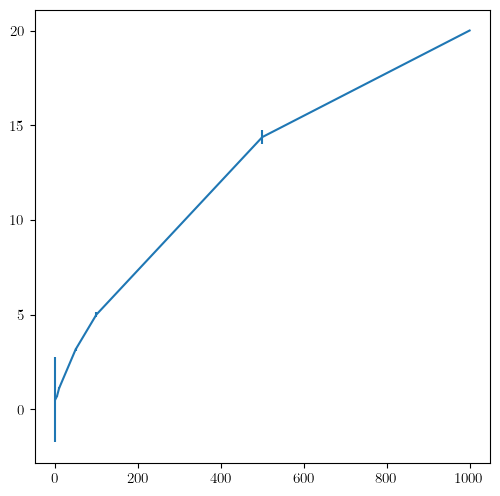

In [38]:
plt.errorbar(ns,Tmaxmean,yerr=Tmaxstd)

: 

: 